## Project 2 -  Analysis of Bitcoin Market Historical Data

Data Source : https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import mean_squared_error

color = sns.color_palette()

%matplotlib inline

### Reading in Bitcoin Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Namratha\Downloads\Bitcoin-Dataset-master\Bitcoin-Dataset-master\bitcoin_dataset.csv', parse_dates=['Date'])

### Data Exploration

In [3]:
df.head(5)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0.0,1.0,0.0,...,31.781022,0.0,241.0,244.0,41240.0,244.0,244.0,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0.0,1.0,0.0,...,154.463801,0.0,234.0,235.0,41475.0,235.0,235.0,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0.0,1.0,0.0,...,1278.516635,0.0,185.0,183.0,41658.0,183.0,183.0,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0.0,1.0,0.0,...,22186.687990,0.0,224.0,224.0,41882.0,224.0,224.0,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0.0,1.0,0.0,...,689.179876,0.0,218.0,218.0,42100.0,218.0,218.0,12266.83,1553.0,0.0


In [4]:
df.shape

(2906, 24)

In [5]:
df.dtypes

Date                                                   datetime64[ns]
btc_market_price                                              float64
btc_total_bitcoins                                            float64
btc_market_cap                                                float64
btc_trade_volume                                              float64
btc_blocks_size                                               float64
btc_avg_block_size                                            float64
btc_n_orphaned_blocks                                         float64
btc_n_transactions_per_block                                  float64
btc_median_confirmation_time                                  float64
btc_hash_rate                                                 float64
btc_difficulty                                                float64
btc_miners_revenue                                            float64
btc_transaction_fees                                          float64
btc_cost_per_transac

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null datetime64[ns]
btc_market_price                                       2903 non-null float64
btc_total_bitcoins                                     2870 non-null float64
btc_market_cap                                         2899 non-null float64
btc_trade_volume                                       2875 non-null float64
btc_blocks_size                                        2872 non-null float64
btc_avg_block_size                                     2901 non-null float64
btc_n_orphaned_blocks                                  2900 non-null float64
btc_n_transactions_per_block                           2902 non-null float64
btc_median_confirmation_time                           2891 non-null float64
btc_hash_rate                                          2896 non-null float64
btc_difficulty                         

In [7]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2903.000000,2.870000e+03,2.899000e+03,2.875000e+03,2872.000000,2901.000000,2900.000000,2902.000000,2891.000000,2.896000e+03,...,2884.000000,2898.000000,2.899000e+03,2896.000000,2.899000e+03,2896.000000,2903.000000,2.898000e+03,2.903000e+03,2.903000e+03
mean,835.633068,1.150861e+07,1.340984e+10,7.415542e+07,35446.344461,0.350432,0.364828,671.163580,7.500961,1.239885e+06,...,67.215351,14.643709,1.940575e+05,101966.977555,6.848288e+07,94527.605663,63123.420255,1.564330e+06,2.036309e+05,2.019018e+08
std,2297.871339,4.201966e+06,3.864239e+10,2.929054e+08,43588.813159,0.353274,0.842967,689.494199,4.977096,2.923568e+06,...,1768.595973,20.555520,2.090391e+05,103840.319030,8.288579e+07,104014.799997,69682.908538,2.280737e+06,2.683944e+05,5.798659e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.650305,8.483650e+06,5.363678e+07,2.928597e+05,780.250000,0.024158,0.000000,54.000000,6.050000,1.160115e+01,...,1.184909,4.156470,1.668000e+04,8021.500000,2.425414e+06,6869.000000,6758.500000,4.878713e+05,9.601850e+04,9.569420e+05
50%,235.000000,1.243342e+07,3.346224e+09,1.002135e+07,15132.000000,0.195853,0.000000,375.000000,7.916667,2.142966e+04,...,2.511869,7.814177,1.305860e+05,62268.500000,3.258235e+07,53513.000000,35259.000000,1.104545e+06,1.784544e+05,3.738958e+07
75%,593.635000,1.519732e+07,8.064165e+09,2.832762e+07,58096.500000,0.676204,0.000000,1232.235669,10.216667,1.025112e+06,...,5.916771,14.800589,3.634850e+05,190357.750000,1.080123e+08,186445.750000,113792.500000,2.030429e+06,2.587641e+05,1.309747e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


A lot of these columns have minimum value of 0 which can indicate either an invalid or missing value. 


### Handling Missing data


In [8]:
df.isnull().values.sum()

283

In [9]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        3
btc_total_bitcoins                                     36
btc_market_cap                                          7
btc_trade_volume                                       31
btc_blocks_size                                        34
btc_avg_block_size                                      5
btc_n_orphaned_blocks                                   6
btc_n_transactions_per_block                            4
btc_median_confirmation_time                           15
btc_hash_rate                                          10
btc_difficulty                                         29
btc_miners_revenue                                      6
btc_transaction_fees                                   16
btc_cost_per_transaction_percent                       22
btc_cost_per_transaction                                8
btc_n_unique_addresses                                  7
btc_n_transact

Number of missing values are approximately 10% of the dataset. 

Lets plot a heat map to understand how the missing values are distributed in the dataset.

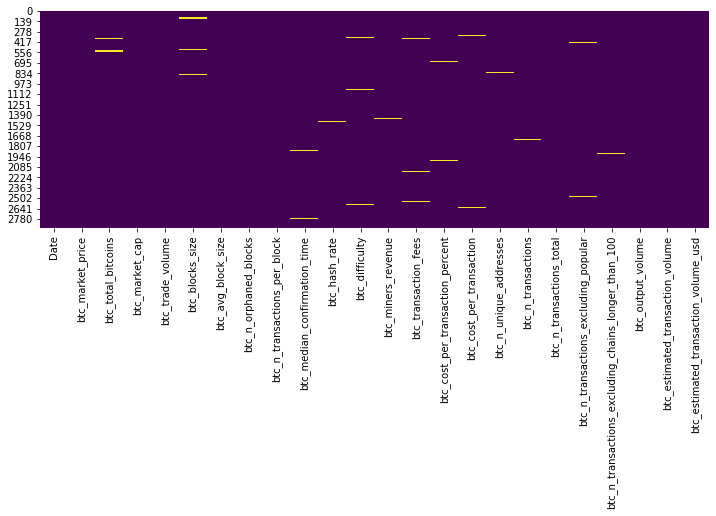

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

A lot of missing values are observed in the lower half of the dataset and are random.

Text(0.5, 1.0, 'btc_blocks_size')

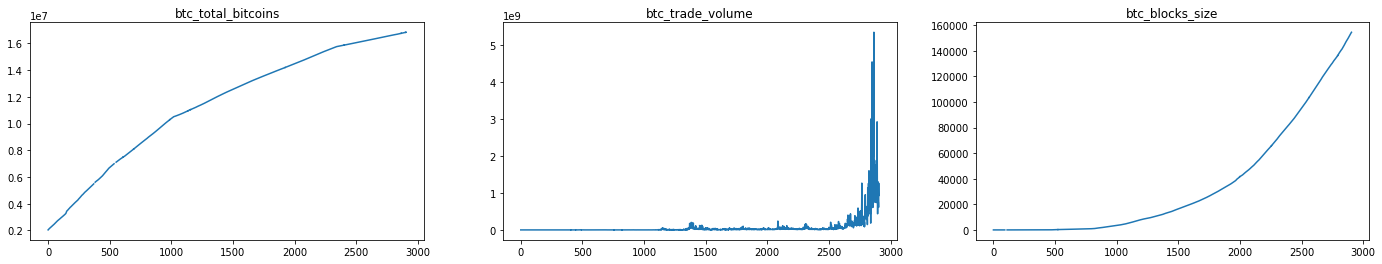

In [11]:
# Let us understand the structure of columns with missing data.

fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(df['btc_total_bitcoins'])
axes[0].set_title("btc_total_bitcoins")

axes[1].plot(df['btc_trade_volume'])
axes[1].set_title("btc_trade_volume")

axes[2].plot(df['btc_blocks_size'])
axes[2].set_title("btc_blocks_size")

Text(0.5, 1.0, 'btc_transaction_fees')

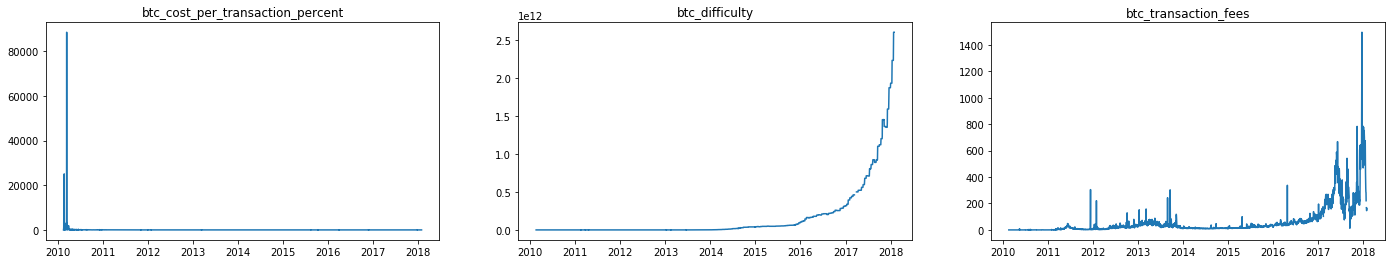

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(df['Date'],df['btc_cost_per_transaction_percent'])
axes[0].set_title("btc_cost_per_transaction_percent")

axes[1].plot(df['Date'],df['btc_difficulty'])
axes[1].set_title("btc_difficulty")

axes[2].plot(df['Date'],df['btc_transaction_fees'])
axes[2].set_title("btc_transaction_fees")

Taking into account all the information got on columns with missing value, we can say that they have widely flucationing values. 

Hence, we have computed the mean per month per year to get closest missing values.Use 'fillna' method to impute the required mean values. 

In [13]:
# Group by the dataset by month and year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

In [14]:
# Get all the column names which are to be imputed into a list 
cols = df.columns.difference(['Date', 'month', 'year'])

In [15]:
# Impute all the columns with missing values with closest mean value
for col in cols:
    df[col] = df.groupby(['month','year'])[col].transform(lambda x:x.fillna(x.mean()))

In [16]:
df.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

### Trend in  Bitcoin Market Price over the years

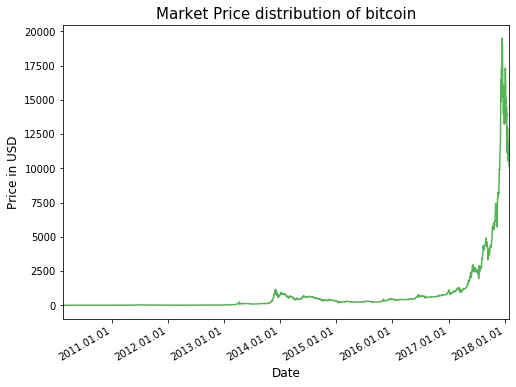

In [17]:
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(8,6))
sns.tsplot(df.btc_market_price.values, time=df.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Market Price distribution of bitcoin", fontsize=15)
plt.show()

As seen in the graph above, value of bitcoin has grown exponentially. 

There was a slight spike in early 2014. However a huge raise was observed in the year 2018 from 1000 USD to more than 17000 USD which later droped to 10000 USD in early 2018.

### Data Leakage

#### Correlation between variables

Dropping unnecessary and duplicate columns:

In [18]:
data = df.copy()

In [19]:
data.drop(['Date','Date_mpl','month','year'], axis =1,inplace = True)

A basic glance at the dataset tells us that there are multiple columns representing the same information. For example, 'btc_n_transactions_per_block','btc_n_transactions_total', 'btc_n_transactions_excluding_popular', and 'btc_n_transactions_excluding_chains_longer_than_100'
represent the number of bitcoin transactions but for different conditions. Hence they are all dropped except for 'btc_n_transactions_per_block'. 

Similarly 'btc_block_size' and 'btc_avg_block_size' are similar. 

In [20]:
data.drop(['btc_blocks_size','btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100'],axis=1, inplace=True)

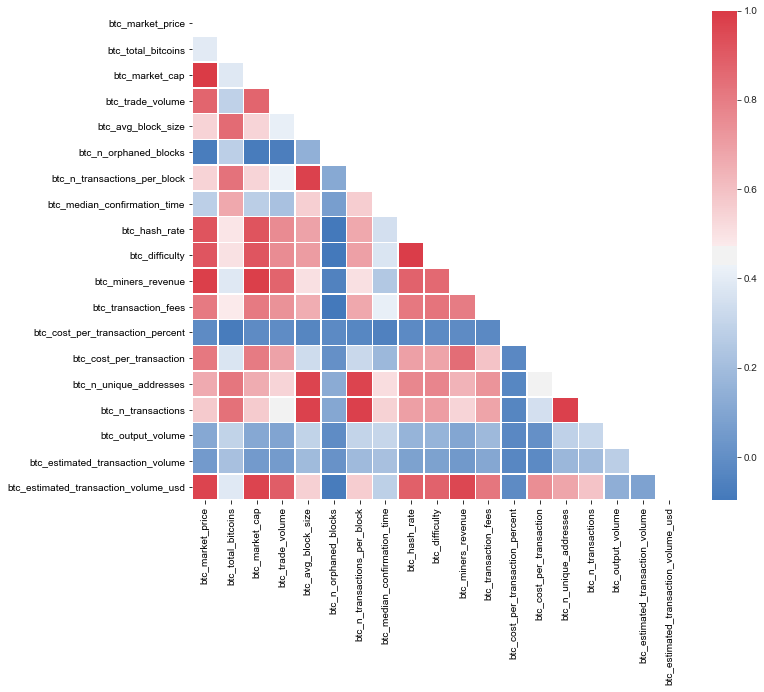

In [21]:
# Calculate correlation between all the columns and visualize the same in a heat map

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,  cmap=cmap,linewidth=.5)
    plt.show()

#### Correlation of features with the Target variable 

In [22]:
print(corr["btc_market_price"].sort_values(ascending=False))

btc_market_price                        1.000000
btc_market_cap                          0.999687
btc_miners_revenue                      0.986812
btc_estimated_transaction_volume_usd    0.968196
btc_hash_rate                           0.921322
btc_difficulty                          0.915974
btc_trade_volume                        0.869236
btc_cost_per_transaction                0.815630
btc_transaction_fees                    0.808556
btc_n_unique_addresses                  0.663777
btc_n_transactions                      0.569195
btc_avg_block_size                      0.543871
btc_n_transactions_per_block            0.543784
btc_total_bitcoins                      0.393416
btc_median_confirmation_time            0.277975
btc_output_volume                       0.110849
btc_estimated_transaction_volume        0.050925
btc_cost_per_transaction_percent       -0.013512
btc_n_orphaned_blocks                  -0.076418
Name: btc_market_price, dtype: float64


The features closest related to Bitcoint Market Price are Market Cap, Miner Revenue, Estimated Transaction Volume USD, Hash Rate, Difficulty and Trade Volume with a correlation coefficient greater than 0.85 

Dropping all the features with the correlation coefficient less than 0.5 since they do not make a significant impact on the bitcoin market price

In [23]:
cols_drop = ['btc_total_bitcoins','btc_median_confirmation_time','btc_output_volume','btc_estimated_transaction_volume',
             'btc_cost_per_transaction_percent','btc_n_orphaned_blocks']

data.drop(cols_drop, axis = 1,inplace = True)

One of the assumptions of models like linear regression is that the independent variables are unrelated to each other. 

Hence, finding the correlation of features with each other in the bitcoin dataset

In [24]:
print(corr["btc_market_cap"].sort_values(ascending=False))

btc_market_cap                          1.000000
btc_market_price                        0.999687
btc_miners_revenue                      0.985459
btc_estimated_transaction_volume_usd    0.968492
btc_hash_rate                           0.922103
btc_difficulty                          0.916821
btc_trade_volume                        0.869418
btc_transaction_fees                    0.808876
btc_cost_per_transaction                0.805704
btc_n_unique_addresses                  0.660723
btc_n_transactions                      0.566629
btc_n_transactions_per_block            0.541611
btc_avg_block_size                      0.541328
btc_total_bitcoins                      0.385604
btc_median_confirmation_time            0.274941
btc_output_volume                       0.111580
btc_estimated_transaction_volume        0.051402
btc_cost_per_transaction_percent       -0.012926
btc_n_orphaned_blocks                  -0.080717
Name: btc_market_cap, dtype: float64


Market Cap is higly correlated with features: Miners Revenue, Estimated transcation Volume USD, Hash Rate and Difficulty. Hence we can retain market cap and drop the rest of the features.

In [25]:
cols_drop = ['btc_market_cap', 'btc_estimated_transaction_volume_usd','btc_hash_rate','btc_difficulty']

data.drop(cols_drop, axis = 1,inplace = True)

In [26]:
data.shape

(2906, 9)

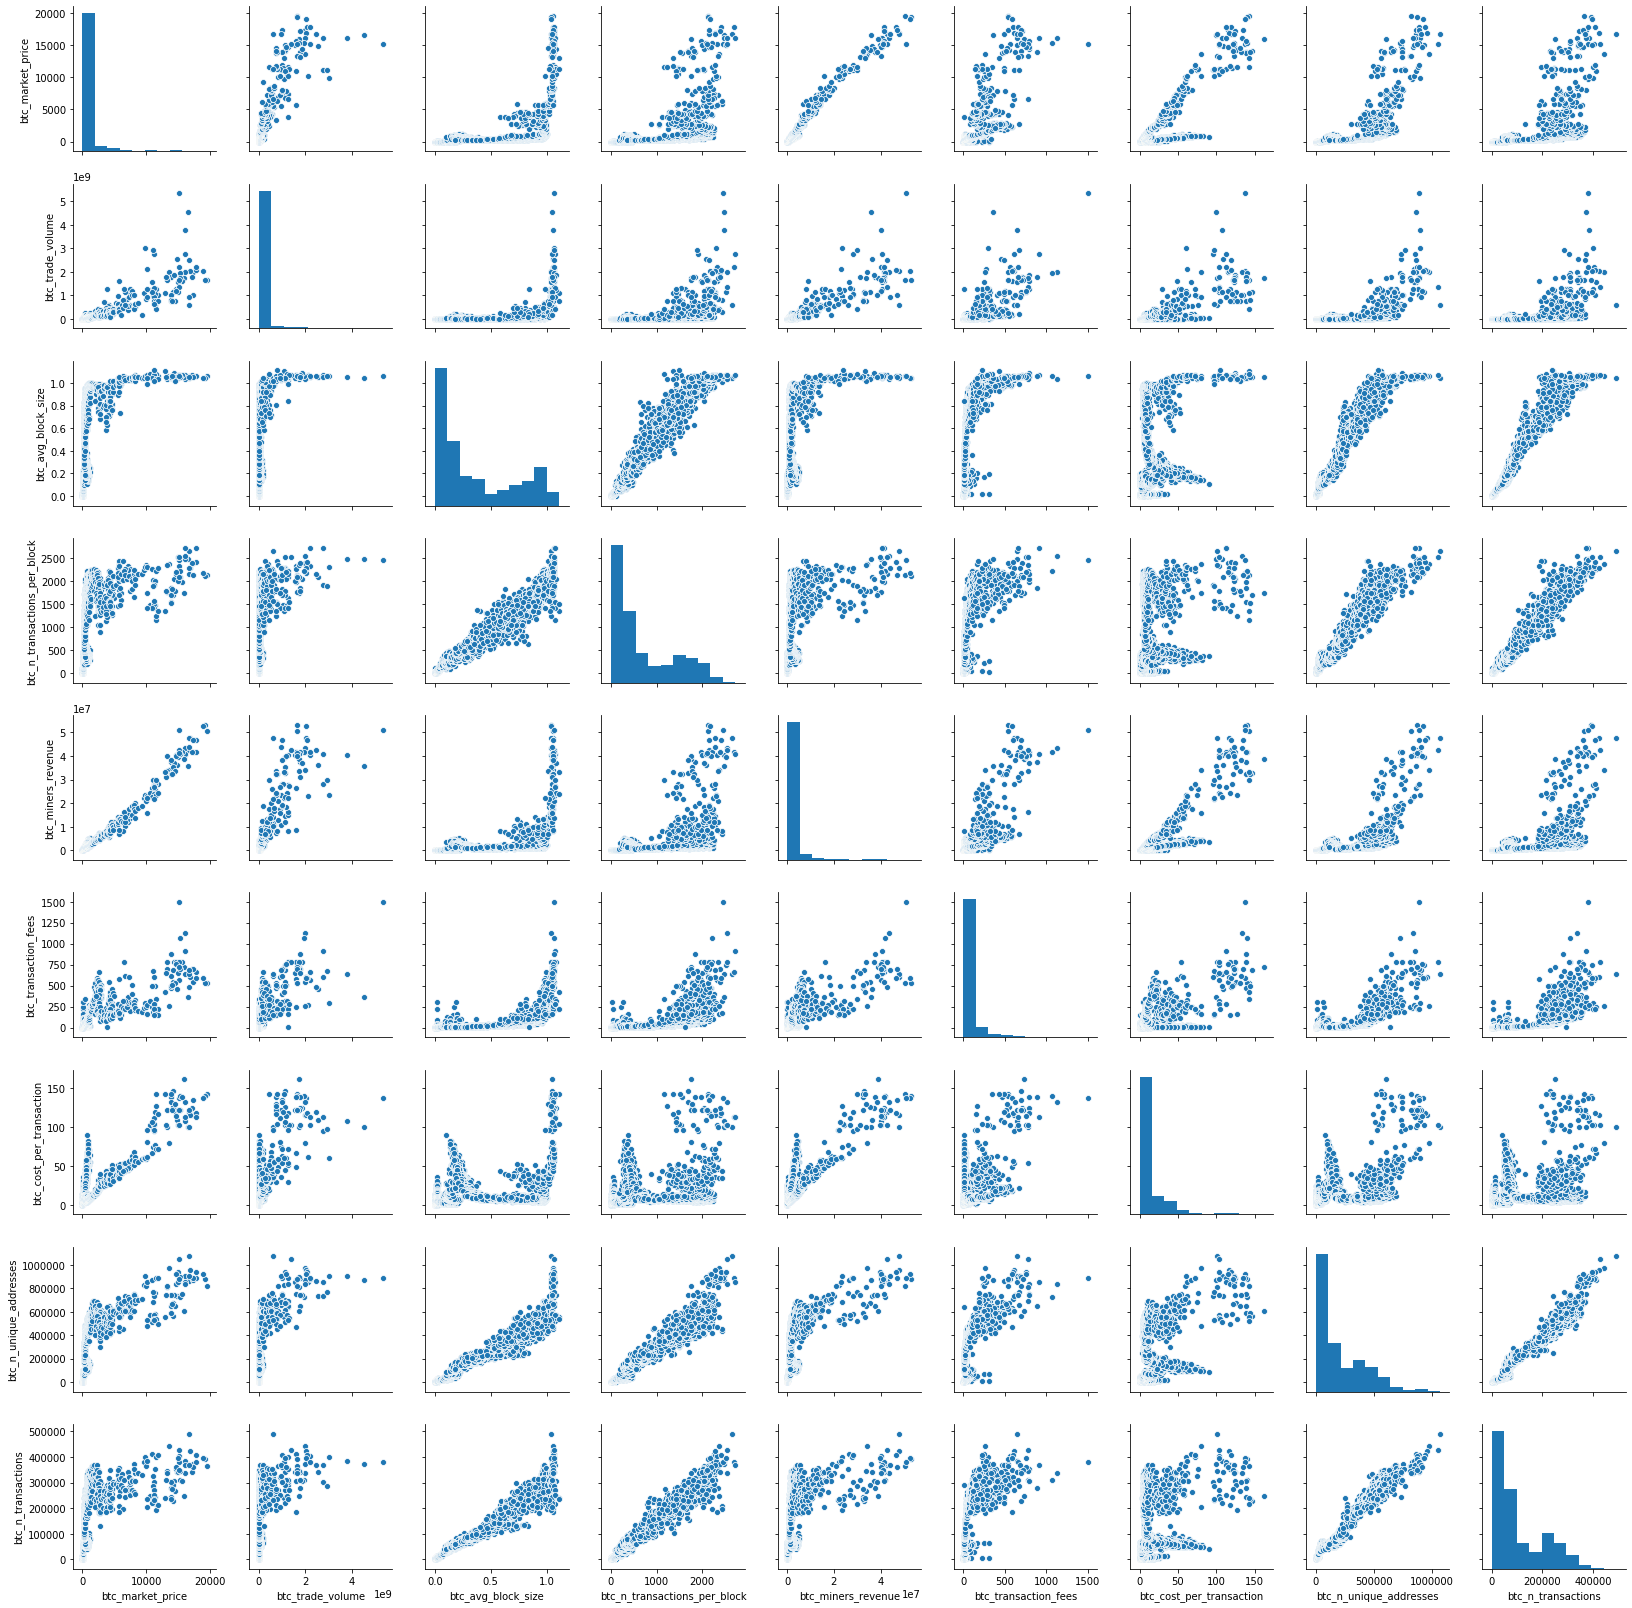

In [27]:
sns.pairplot(data)

In [28]:
data.skew()

btc_market_price                4.966519
btc_trade_volume                8.251318
btc_avg_block_size              0.717885
btc_n_transactions_per_block    0.883099
btc_miners_revenue              5.546369
btc_transaction_fees            4.135973
btc_cost_per_transaction        3.306647
btc_n_unique_addresses          1.065549
btc_n_transactions              0.922699
dtype: float64

### Logarithmic Transformation

From the above plot, we observe that the columns are left skewed. Hence applying log tranformation to all the columns.

In [29]:
logdata = data.copy()

In [30]:
to_log = data.columns
logdata = data[to_log].applymap(lambda x: np.log(x+1))

In [31]:
logdata.head()

,btc_market_price,btc_trade_volume,btc_avg_block_size,btc_n_transactions_per_block,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions
0,0.0,0.0,0.000235,0.693147,0.0,0.0,0.0,5.488938,5.501258
1,0.0,0.0,0.000241,0.693147,0.0,0.0,0.0,5.459586,5.463832
2,0.0,0.0,0.000228,0.693147,0.0,0.0,0.0,5.225747,5.214936
3,0.0,0.0,0.000218,0.693147,0.0,0.0,0.0,5.416100,5.416100
4,0.0,0.0,0.000234,0.693147,0.0,0.0,0.0,5.389072,5.389072


### Data Scaling

Min-Max scaling will be the best type for scaling for bitcoin dataset. This will help us scale the data to fixed range of 0 to 1 and reduce the standard deviation and thereby outliers.

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
y = logdata['btc_market_price']
X = logdata.drop(['btc_market_price'], axis =1)

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state = 20,test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Train the data with Cross validation and GridSearch

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To store cross validation mean scores of different models 
cv_s= {}

## Regression Models with Bagging and Pasting

### 1. Using Bagging Regressor with Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#### Grid Search for Decision Tree Regression

In [36]:
param_grid = {'max_depth': range(1,11)}

tree_reg = DecisionTreeRegressor(random_state=0)

dt_reg = GridSearchCV(tree_reg, param_grid, n_jobs=3, cv = 5)
dt_reg.fit(X_train, y_train)

#use gridsearch to find the best parameters
print('Best parameters{}'.format(dt_reg.best_params_))
print('Best score {:.4f}'.format(dt_reg.best_score_))

Best parameters{'max_depth': 10}
Best score 0.9973


#### Decision Tree Regressor without bagging or pasting

In [37]:
dt_reg = DecisionTreeRegressor(max_depth = 10, random_state = 0)
dt_reg.fit(X_train, y_train)

print('Train score: {:.4f}'.format(dt_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dt_reg.score(X_test, y_test)))

Train score: 0.9996
Test score: 0.9980


#### Grid Search for Bagging Regressor

In [38]:
param_grid = {"n_estimators": [300,400,500],
              "max_samples": [0.1,0.5,1],
              "max_features":[1,2,4,6,8],
              "bootstrap": [True, False],
              "bootstrap_features": [True, False]}

bag_reg = BaggingRegressor(dt_reg, random_state = 0)

bag_grid = GridSearchCV(bag_reg, param_grid, cv = 5, n_jobs = 5)
bag_grid.fit(X_train, y_train)

#use gridsearch to find the best parameters
print('Best parameters{}'.format(bag_grid.best_params_))
print('Best score {:.4f}'.format(bag_grid.best_score_))

Best parameters{'bootstrap': False, 'bootstrap_features': False, 'max_features': 6, 'max_samples': 0.5, 'n_estimators': 500}
Best score 0.9985


#### Decision Tree with Bagging meta-estimator

In [39]:
bag_reg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=0.5, bootstrap=True, random_state=0)
bag_reg.fit(X_train, y_train)

print('Train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.9994
Test score: 0.9987


#### Out of Bag evaluation

In [40]:
dt_reg = DecisionTreeRegressor(random_state = 0)
bag_reg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=0.5, bootstrap=True, random_state=0, oob_score=True)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print('Train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(X_test, y_test)))

print('\nOut of bag evauation score: {:.4f}'.format(bag_reg.oob_score_))

Train score: 0.9995
Test score: 0.9987

Out of bag evauation score: 0.9985


#### Decision tree with Pasting

In [41]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state = 0)
bag_reg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=0.5, bootstrap=False, bootstrap_features = False, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print('Train score: {:.4f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.9997
Test score: 0.9988


Hyperparamter tuning for Bagging Regressor with Decision tree suggested that pasting is better than bagging for the Bitcoin dataset. Hence lets find cross validation scores for the same.

#### Cross Vaidation Scores

In [42]:
# Cross Validation Scores for Train Data
cv_scores = cross_val_score(bag_reg, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross Validation Scores for Test Data
cv_test_scores = cross_val_score(bag_reg, X_test, y_test,cv = 5)
cv_s['Decision Tree with Pasting']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99845624 0.99856027 0.99864842 0.99855868 0.99818107]
Mean cross-validation training score (5-fold): 0.9985


#### Accuracy of Prediction

In [43]:
y_pred = bag_reg.predict(X_test)

r2 = metrics.r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('Coefficient of Determination: %.4f' %r2)
print("Mean Square Eroor: %.4f" % mse)
print("Root MSE: %.4f" % np.sqrt(mse))

Coefficient of Determination: 0.9988
Mean Square Eroor: 0.0086
Root MSE: 0.0925


### 2. Using Random Forest Regression

#### Grid Search for Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {"n_estimators": [100,150,200],
              "max_features":['auto', 'sqrt', 'log2'],
              "max_depth": range(5,11),
              "bootstrap": [True, False]
             }

rnd_reg = RandomForestRegressor(random_state = 0)

rnd_reg = GridSearchCV(rnd_reg, param_grid, n_jobs = 6, cv = 5)
rnd_reg.fit(X_train, y_train)

#use gridsearch to get the best parameters
print('Best parameters{}'.format(rnd_reg.best_params_))
print('Best score {:.4f}'.format(rnd_reg.best_score_))

Best parameters{'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}
Best score 0.9986


#### Random Forest with Bagging meta-estimator

In [45]:
rnd_reg = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='log2', bootstrap=True, random_state=0)
rnd_reg.fit(X_train, y_train)

print("Train score: {:.4f}".format(rnd_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(rnd_reg.score(X_test, y_test)))

Train score: 0.9996
Test score: 0.9989


#### Out-of-bag Evauation

In [46]:
rnd_reg = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='log2', bootstrap=True, oob_score = True, random_state=0)
rnd_reg.fit(X_train, y_train)

print("Train score: {:.4f}".format(rnd_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(rnd_reg.score(X_test, y_test)))

print('\nOut of bag evauation score: {:.4f}'.format(rnd_reg.oob_score_))

Train score: 0.9996
Test score: 0.9989

Out of bag evauation score: 0.9985


#### Random Forest with Pasting

In [47]:
rnd_reg = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='log2', bootstrap=False, random_state=0)
rnd_reg.fit(X_train, y_train)

print("Train score: {:.4f}".format(rnd_reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(rnd_reg.score(X_test, y_test)))

Train score: 0.9997
Test score: 0.9990


Hyperparamter tuning for Random Forest Regression suggests that pasting is better than bagging for the Bitcoin dataset. Hence lets find cross validation scores for the same.

#### Cross Validation Scores

In [48]:
# Cross Validation
cv_scores = cross_val_score(rnd_reg, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

cv_test_scores = cross_val_score(rnd_reg, X_test, y_test,cv = 5)
cv_s['Random Forest with Pasting']=[round(np.mean(cv_scores),4),round(np.mean(cv_test_scores),4)]

Cross-validation training scores (5-fold): [0.99849988 0.99864805 0.99876231 0.99844345 0.99843354]
Mean cross-validation training score (5-fold): 0.9986


#### Accuracy of Prediction

In [49]:
y_pred = rnd_reg.predict(X_test)

r2 = metrics.r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('Coefficient of Determination: %.4f' %r2)
print("Mean Square Eroor: %.4f" %mse)
print("Root MSE: %.4f" %np.sqrt(mse))

Coefficient of Determination: 0.9990
Mean Square Eroor: 0.0072
Root MSE: 0.0848


#### Feature Importance

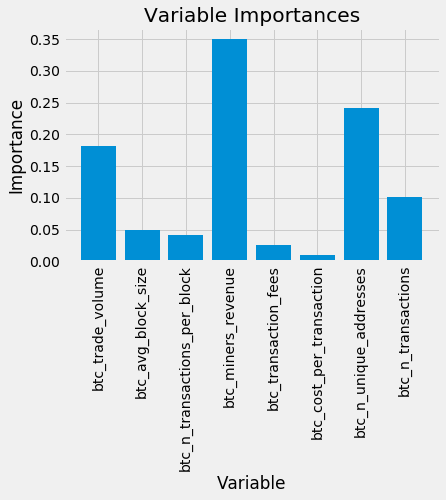

In [50]:
plt.style.use('fivethirtyeight')

feature_list = list(logdata.columns)
del feature_list[0]
                 
# Get numerical feature importances
importances = list(rnd_reg.feature_importances_)

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

## AdaBoost Boosting

### 1. Using AdaBoost Regressor

#### Grid Search for AdaBoost Regressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'learning_rate':[ 0.01, 0.05, 0.1], 
              'n_estimators': [100,200,300]}

ada_reg = AdaBoostRegressor()

ada_reg = GridSearchCV(ada_reg, param_grid, n_jobs=4, cv=5)
ada_reg.fit(X_train, y_train)

#use gridsearch to get the best parameters
print('Best parameters{}'.format(ada_reg.best_params_))
print('Best score {:.4f}'.format(ada_reg.best_score_))

Best parameters{'learning_rate': 0.1, 'n_estimators': 300}
Best score 0.9908


#### Train the Model

In [52]:
ada_reg = AdaBoostRegressor(n_estimators=300, learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)

print('Train score: {:.4f}'.format(ada_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.9915
Test score: 0.9920


#### Cross Validation Scores

In [53]:
# Cross Validation
cv_scores = cross_val_score(ada_reg, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

cv_test_scores = cross_val_score(ada_reg, X_test, y_test,cv = 5)
cv_s['AdaBoost Regressor']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.98989947 0.99123677 0.99149602 0.99057718 0.99071176]
Mean cross-validation training score (5-fold): 0.9908


#### Accuracy of Prediction

In [54]:
y_pred = ada_reg.predict(X_test)

r2 = metrics.r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('Coefficient of Determination: %.4f' %r2)
print("Mean Square Eroor: %.4f" %mse)
print("Root MSE: %.4f" %np.sqrt(mse))

Coefficient of Determination: 0.9920
Mean Square Eroor: 0.0573
Root MSE: 0.2394


### 2. Using Decision Tree Regressor with AdaBoost

#### Decision Tree with AdaBoost Regressor

Using the best parameters for Decision Tree and AdaBoost Regressor obtained before, Decision Tree regressor with adaboost boosting is run.

In [55]:
from sklearn.ensemble import AdaBoostRegressor

dt_reg = DecisionTreeRegressor(max_depth = 10, random_state = 0)
ada_reg = AdaBoostRegressor(dt_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)

print('Train score: {:.4f}'.format(ada_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.9999
Test score: 0.9990


#### Cross Validation Scores

In [56]:
# Cross Validation
cv_scores = cross_val_score(ada_reg, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

cv_test_scores = cross_val_score(ada_reg, X_test, y_test,cv = 5)
cv_s['Decision Tree with AdaBoost Regressor']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99867859 0.9988039  0.99891158 0.99831382 0.99818144]
Mean cross-validation training score (5-fold): 0.9986


#### Accuracy of Prediction

In [57]:
y_pred = ada_reg.predict(X_test)

r2 = metrics.r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('Coefficient of Determination: %.4f' %r2)
print("Mean Square Eroor: %.4f" % mse)
print("Root MSE: %.4f" % np.sqrt(mse))

Coefficient of Determination: 0.9990
Mean Square Eroor: 0.0071
Root MSE: 0.0845


## Gradient Boosting

#### Grid Search for Gradient Boosting Regressor

In [58]:
from  sklearn.ensemble import GradientBoostingRegressor

param_grid = {'n_estimators':[10,100,200], 
              'learning_rate': [1.0,0.1,0.01],
              'max_depth':[2,4,6], 
              'min_samples_leaf':[1,3,5,9], 
              'max_features':[1.0,0.3]}

gbr_reg = GradientBoostingRegressor()

# fit the grid with data
gbr_grid = GridSearchCV(gbr_reg, param_grid, cv = 5, n_jobs = 5)
gbr_grid.fit(X_train, y_train)

#use gridsearch to get the best parameters
print('Best parameters{}'.format(gbr_grid.best_params_))
print('Best score {:.4f}'.format(gbr_grid.best_score_))

Best parameters{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 200}
Best score 0.9987


#### Train the Model

In [59]:
gbrt_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, n_estimators=200) 
gbrt_reg.fit(X_train, y_train) 

print('Train score: {:.4f}'.format(gbrt_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gbrt_reg.score(X_test, y_test)))

Train score: 0.9999
Test score: 0.9991


#### Cross Validation Scores

In [60]:
# Cross Validation
cv_scores = cross_val_score(gbrt_reg, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

cv_test_scores = cross_val_score(ada_reg, X_test, y_test,cv = 5)
cv_s['Gradient Boosting Regressor']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99866537 0.9987239  0.99879147 0.99870417 0.99848057]
Mean cross-validation training score (5-fold): 0.9987


#### Accuracy of Prediction

In [61]:
y_pred = gbrt_reg.predict(X_test)

r2 = metrics.r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('Coefficient of Determination: %.4f' %r2)
print("Mean Square Eroor: %.4f" % mse)
print("Root MSE: %.4f" % np.sqrt(mse))

Coefficient of Determination: 0.9991
Mean Square Eroor: 0.0065
Root MSE: 0.0803


####  Feature Importance

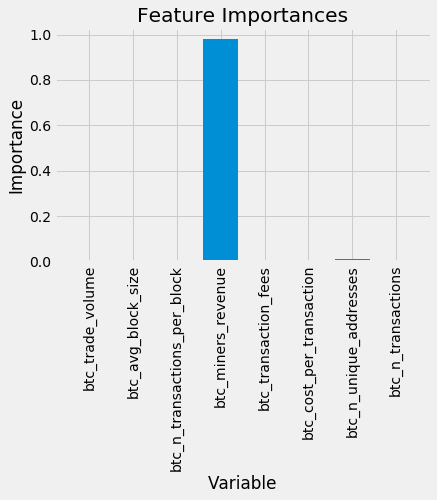

In [62]:
# Get numerical feature importances
importances = list(gbrt_reg.feature_importances_)

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Feature Importances');

## Evaluation of Models

In [63]:
model_val = pd.DataFrame(cv_s).T
model_val.columns = ['Train Score', 'Test Score']
# Format all the values to 2 decimal numbers and convert to percentage
model_val = model_val*100
model_val.round(2)

,Train Score,Test Score
Decision Tree with Pasting,99.85,99.68
Random Forest with Pasting,99.86,99.75
AdaBoost Regressor,99.08,99.10
Decision Tree with AdaBoost Regressor,99.86,99.73
Gradient Boosting Regressor,99.87,99.73


The train and test score for all the models is almost the same.

## Data Reduction using PCA

 Considering the original data before data reduction using correlation matrix for better comparison of results.

In [64]:
new_data = df.copy()

new_data.drop(['Date','Date_mpl','month','year'], axis =1,inplace = True)

#### Applying Logarithmic Transformation

From the above plot, we observe that the columns are left skewed. Hence applying log tranformation to all the columns.

In [65]:
to_log = new_data.columns
new_data = new_data[to_log].applymap(lambda x: np.log(x+1))

In [66]:
new_data.shape

(2906, 23)

#### Scaling the data

Min-Max scaling will be the best type for scaling for bitcoin dataset. This will help us scale the data to fixed range of 0 to 1 and reduce the standard deviation and thereby outliers.

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [68]:
y = new_data['btc_market_price']
X = new_data.drop(['btc_market_price'], axis =1)

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state = 20,test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [69]:
# To store cross validation mean scores of different models
scores = {}

### Apply PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [71]:
pca.explained_variance_ratio_

array([0.84365071, 0.05071992, 0.03921522, 0.03058173])

In [72]:
np.sum(pca.explained_variance_ratio_)

0.9641675738636005

The 4 principal components cover about 96.42% of the variance in the dataset. This is good enough to proceed. 

### 1. KNN Regressor

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

param_grid = [{'weights': ['uniform', 'distance'],
                             'n_neighbors': range(1,11)
                             }
                            ]
knn_grid = GridSearchCV(knr, param_grid, cv=5)

# fit the grid with data
knn_grid.fit(X_train_PCA, y_train)

knn_grid.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [74]:
knr = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')  
knr.fit(X_train_PCA, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [75]:
cv_scores = cross_val_score(knr, X_train_PCA, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross validation scores for test data

cv_test_scores = cross_val_score(knr, X_test_PCA, y_test,cv = 5)
scores['K-neighbors regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99819155 0.99829162 0.99856638 0.9981469  0.99800979]
Average cross-validation training score (5-fold): 0.9982


### 2. Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

parameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}

lreg_grid = GridSearchCV(lreg, parameters, cv=5)

# fit the grid with data
lreg_grid.fit(X_train_PCA, y_train)

lreg_grid.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}

In [77]:
lreg = LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
lreg.fit(X_train_PCA, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [78]:
# Cross Validation for training data
cv_scores = cross_val_score(lreg, X_train_PCA, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)

print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross validation scores for test data

cv_test_scores = cross_val_score(lreg, X_test_PCA, y_test,cv = 5)
scores['LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.94628575 0.9482905  0.94378348 0.94248094 0.94809226]
Average cross-validation training score (5-fold): 0.9458


### 3. Ridge Regression

In [79]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha':[0.001,0.01, 0.1,1]}

ridge_grid = GridSearchCV(ridge, param_grid, cv = 5)
ridge_grid.fit(X_train_PCA, y_train)

#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters{}'.format(ridge_grid.best_params_))
print('Best score {:.4f}'.format(ridge_grid.best_score_))

Best parameters{'alpha': 0.01}
Best score 0.9458


In [80]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train_PCA, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
# Cross Validation
cv_scores = cross_val_score(ridge, X_train_PCA, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)

print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

cv_test_scores = cross_val_score(ridge, X_test_PCA, y_test,cv = 5)
scores['Ridge']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.94628545 0.94829027 0.94378389 0.94248111 0.94809224]
Mean cross-validation training score (5-fold): 0.9458


### 4. Lasso Regression

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 100000)
param_grid = {'alpha':[0.017, 0.02, 0.023, 0.026]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train_PCA, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.4f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.017}
Best score 0.9440


In [83]:
lasso = Lasso(alpha = 0.017,max_iter = 100000)
lasso.fit(X_train_PCA, y_train)

Lasso(alpha=0.017, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
cv_scores = cross_val_score(lasso, X_train_PCA, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

cv_test_scores = cross_val_score(lasso, X_test_PCA, y_test,cv = 5)
scores['Lasso']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.94385895 0.94610986 0.94268073 0.94091616 0.94641932]
Mean cross-validation training score (5-fold): 0.9440


### 5. Polynomial Regression

In [85]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_py = poly.fit_transform(X_train_PCA)
X_test_py= poly.transform(X_test_PCA)

lreg.fit(X_train_py, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [86]:
# Cross Validation for Training data

cv_scores = cross_val_score(lreg, X_train_py, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross Validation for Test data

cv_test_scores = cross_val_score(lreg, X_test_py, y_test,cv = 5)
scores['Polynomial deg 2 LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99391177 0.99443182 0.99496339 0.99420896 0.99488991]
Average cross-validation training score (5-fold): 0.9945


### 6. Polynomial Ridge Regression

In [87]:
linridge = Ridge(alpha = 0.01)
linridge.fit(X_train_py, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
# Cross Validation for Training Data
cv_scores = cross_val_score(linridge, X_train_py, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross Validation for Test Data

cv_test_scores = cross_val_score(linridge, X_test_py, y_test,cv = 5)
scores['Polynomial deg 2 Ridge Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99391173 0.99443225 0.99496193 0.99420869 0.99489361]
Average cross-validation training score (5-fold): 0.9945


### 7. Polynomial Lasso Regression

In [89]:
linlasso = Lasso(alpha = 0.017,max_iter = 100000)
linlasso.fit(X_train_py, y_train)

Lasso(alpha=0.017, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
# Cross validation for Training data

cv_scores = cross_val_score(linlasso, X_train_py, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross Validation for Test data

cv_test_scores = cross_val_score(linlasso, X_test_py, y_test,cv = 5)
scores['Polynomial deg 2 Lasso Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.98168655 0.98381963 0.98335832 0.98136878 0.98245695]
Average cross-validation training score (5-fold): 0.9825


### Support Vector Machine

### 8. Linear SVM

In [91]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.5, 1], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1]}

svr_grid = GridSearchCV(svr, param_grid, cv = 5)
svr_grid.fit(X_train_PCA, y_train)

svr_grid.best_params_

{'C': 0.05, 'gamma': 0.001}

In [92]:
svr = SVR(kernel = 'linear', C = 0.05, gamma = 0.001)
svr.fit(X_train_PCA, y_train)

SVR(C=0.05, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [93]:
# Cross Validation for Training data

cv_scores = cross_val_score(svr, X_train_PCA, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross Validation for Test data
cv_test_scores = cross_val_score(svr, X_test_PCA, y_test,cv = 5)
scores['Linear SVM']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.93653223 0.93931308 0.93717657 0.93456401 0.93660202]
Average cross-validation training score (5-fold): 0.9368


### 9. SVM with Kernel

#### kernel = 'poly'

In [94]:
svr = SVR(kernel = 'poly')
param_grid = {'C':[0.01, 0.05, 0.1, 0.5, 1], 
              'gamma': [0.001, 0.01, 0.1, 1]}

svr_grid = GridSearchCV(svr, param_grid, cv = 5)
svr_grid.fit(X_train_PCA, y_train)

svr_grid.best_params_

{'C': 1, 'gamma': 1}

In [95]:
svr = SVR(kernel = 'poly', C = 1, gamma = 1)
svr.fit(X_train_PCA, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [96]:
cv_scores = cross_val_score(svr, X_train_PCA, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross Validation for Test data
cv_test_scores = cross_val_score(svr, X_test_PCA, y_test,cv = 5)
scores['SVM kernel - poly']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.92237272 0.92698039 0.91352893 0.91367064 0.92072796]
Average cross-validation training score (5-fold): 0.9195


#### kernel = 'rbf'

In [97]:
svr = SVR(kernel = 'rbf')
param_grid = {'C':[0.05, 0.1, 0.5, 1], 
              'gamma': [0.01, 0.05, 0.1, 0.5, 1]}

svr_grid = GridSearchCV(svr, param_grid, cv = 5)
svr_grid.fit(X_train_PCA, y_train)

svr_grid.best_params_

{'C': 1, 'gamma': 1}

In [98]:
svr = SVR(kernel = 'rbf', C = 1, gamma = 1)
svr.fit(X_train_PCA, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [99]:
# Cross Validation for Training data

cv_scores = cross_val_score(svr, X_train_PCA, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.4f}'.format(np.mean(cv_scores)))

# Cross Validation for Test data
cv_test_scores = cross_val_score(svr, X_test_PCA, y_test,cv = 5)
scores['SVM kernel - rbf']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99686911 0.9974884  0.99754582 0.99690494 0.99761564]
Average cross-validation training score (5-fold): 0.9973


### Evaluation of Models

In [100]:
from IPython.display import Image

In [101]:
df = pd.DataFrame(scores).T
df.columns = ['Train Score', 'Test Score']

In [102]:
df

,Train Score,Test Score
K-neighbors regression,0.998241,0.997241
LinearRegression,0.945787,0.948573
Ridge,0.945787,0.948572
Lasso,0.943997,0.946672
Polynomial deg 2 LinearRegression,0.994481,0.994327
Polynomial deg 2 Ridge Regression,0.994482,0.994330
Polynomial deg 2 Lasso Regression,0.982538,0.984417
Linear SVM,0.936838,0.932779
SVM kernel - poly,0.919456,0.909233
SVM kernel - rbf,0.997285,0.996400


Let compare the results to the models before applying PCA

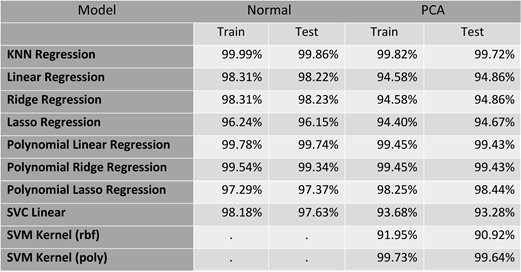

1. KNN, Polynomial Linear, and Polynomial Ridge Regressors are presenting the same results irrespective of either correlation matrix or PCA used for dimension reduction. 

2. There is about 4% decrease in accuracy scores observed in Linear, Ridge, Lasso, and SVM Linear Regression models. 

3. A small increase in scores is seen in Polynomial Lasso Regression models. This model was considered the best in Project 1 and is still the best model after applying PCA. 

4. SVM with Kernel using 'rbf' has a score of 91.95 whereas that for 'poly' is 99.73%. 

Overall, using PCA for dimension reduction has a good impact on the scores for most of the regression models.





## Neural Network Model

In [103]:
%matplotlib inline
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

np.random.seed(0) # for reproducibility

Using TensorFlow backend.


In [104]:
X_train.shape

(2324, 22)

In [105]:
X_test.shape

(582, 22)

#### Build the Model

In [106]:
NN_model = Sequential()

# The Input Layer : with 8 nodes
NN_model.add(Dense(8, input_dim = X_train.shape[1], activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

#### Compile the Model

In [107]:
# Compile the network : loss Function - Mean Squared Error, Evaluation Metrics - Mean Absolute Error and accuracy
NN_model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
NN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 184       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


#### Train the Model

In [108]:
NN_model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
2324/2324 [==============================] - 2s 990us/step - loss: 22.8932 - mean_absolute_error: 4.0864 - acc: 0.0637
Epoch 2/50
2324/2324 [==============================] - 0s 39us/step - loss: 9.0454 - mean_absolute_error: 2.4498 - acc: 0.0267
Epoch 3/50
2324/2324 [==============================] - 0s 37us/step - loss: 1.9005 - mean_absolute_error: 1.1553 - acc: 0.0000e+00
Epoch 4/50
2324/2324 [==============================] - 0s 38us/step - loss: 1.5243 - mean_absolute_error: 0.9882 - acc: 4.3029e-04
Epoch 5/50
2324/2324 [==============================] - 0s 41us/step - loss: 1.4074 - mean_absolute_error: 0.9510 - acc: 0.0030
Epoch 6/50
2324/2324 [==============================] - 0s 39us/step - loss: 1.2877 - mean_absolute_error: 0.9044 - acc: 0.0082
Epoch 7/50
2324/2324 [==============================] - 0s 41us/step - loss: 1.1699 - mean_absolute_error: 0.8625 - acc: 0.0228
Epoch 8/50
2324/2324 [==============================] - 0s 38us/step - loss: 1.0490 - mean_ab

#### Accuracy of Prediction

In [109]:
y_pred = NN_model.predict(X_test)

print("Coefficient of Determination: {:.4f}" .format(metrics.r2_score(y_test,y_pred)))

Coefficient of Determination: 0.9935


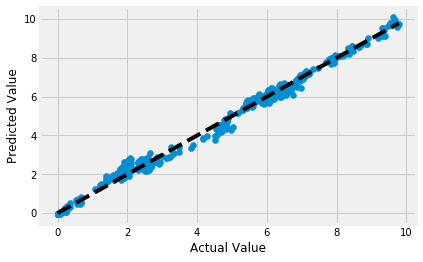

In [110]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
plt.show()

#### Visualizing the Neural Network

In [111]:
from ann_visualizer.visualize import ann_viz;

ann_viz(NN_model, title="Neural Network for Bit Coin Market Price Analysis");

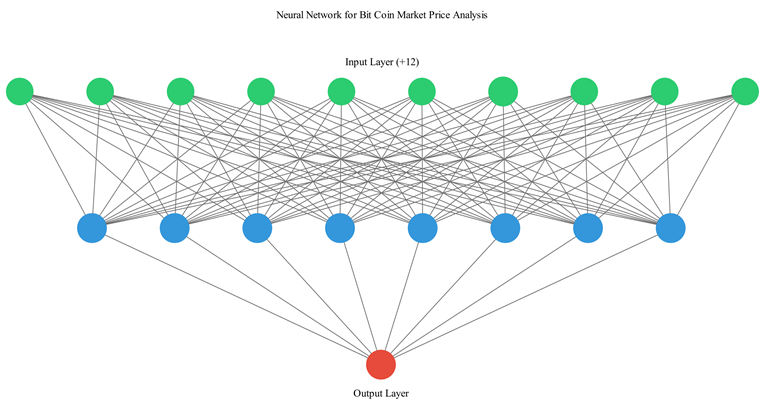